# Manhattan plot
* Create Manhattan plots for both the original and final synthetic genome/phenome data.
* Manhattan plots show the negative logarithm of the P-value as a function of genomic location. Thus the SNPs with the most significant association stand out on the plot, usually as stacks of points because of haploblock structure. 

In [1]:
!pwd

/home/amy/GitHub/synthetic-data-genomics/research_paper_code/notebooks


In [2]:
import os

os.chdir('/home/amy/GitHub/synthetic-data-genomics/')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def manhattan_plot(df: pd.DataFrame, title='Manhattan Plot'):
    
    # Sort the dataframe and remove unnecessary cols
    df = df.sort_values(['chr', 'pos']).reset_index()
    df = df[['chr', 'pos', 'p']]
    df

    # Create the manhattan plot base by adding logp and index
    df['-logp'] = -np.log10(df.p)
    df['-logp'] = df['-logp'] 
    df.reset_index(inplace=True, drop=True)
    df['i'] = df.index

    plot = sns.relplot(data=df, 
                       x='i', 
                       y='-logp', 
                       aspect=4, 
                       hue='chr', 
                       palette='bright', 
                       linewidth=0,
                       legend=None)

    chrom_df=df.groupby('chr')['i'].median()
    plot.ax.set_xlabel('chr'); 
    plot.ax.set_xticks(chrom_df)
    plot.ax.set_xticklabels(chrom_df.index)
    plot.fig.suptitle(title)

    plt.axhline(8, ls='--', linewidth=1, color='black')


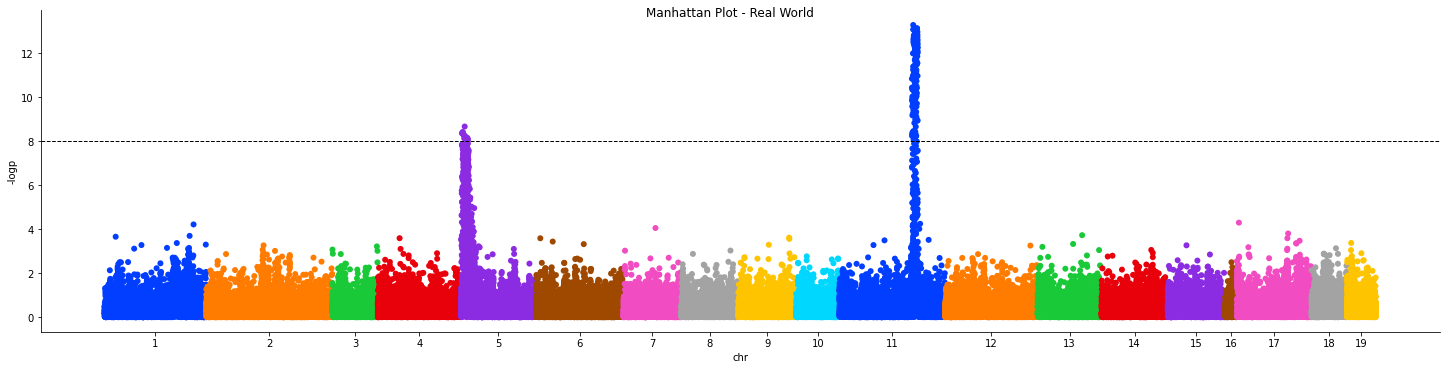

In [12]:
real_world = pd.read_csv('/home/amy/GitHub/synthetic-data-genomics/mice_data_set/out/lm_abBMD_1_79646.csv')
manhattan_plot(real_world, title='Manhattan Plot - Real World')

/home/amy/GitHub/transformers/venv/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


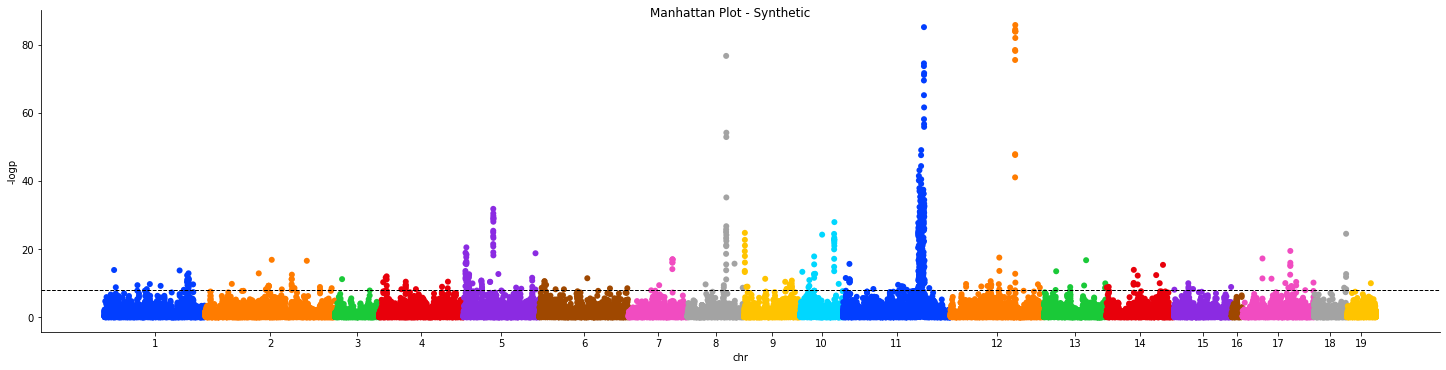

In [13]:
synthetic = pd.read_csv('/home/amy/GitHub/synthetic-data-genomics/mice_data_set/out_synth/lm_batchall_abBMD_1_71316.csv')
manhattan_plot(synthetic, title='Manhattan Plot - Synthetic')